**stacking** One of the coolest ensemble learning techniques out there.

# **What is Stacking ?**

Stacking (or stacked generalization) is an ensemble technique where multiple models (base learners) are trained, and their predictions are then combined by another model (called the meta-learner or blender) to make a final prediction.



So instead of doing a simple average or majority vote (like bagging or boosting), stacking learns how to combine models more intelligently.

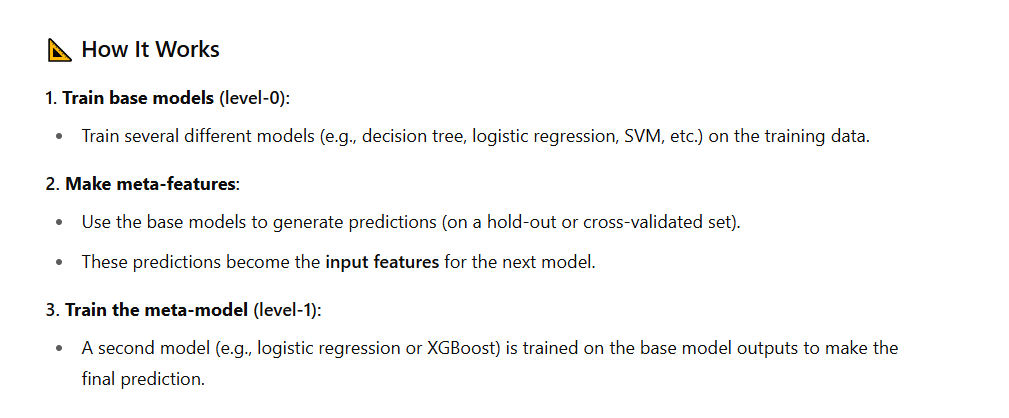

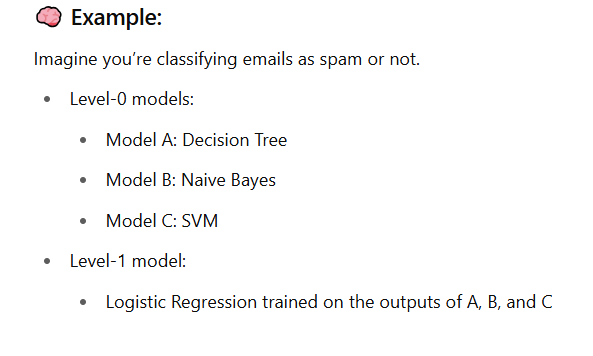

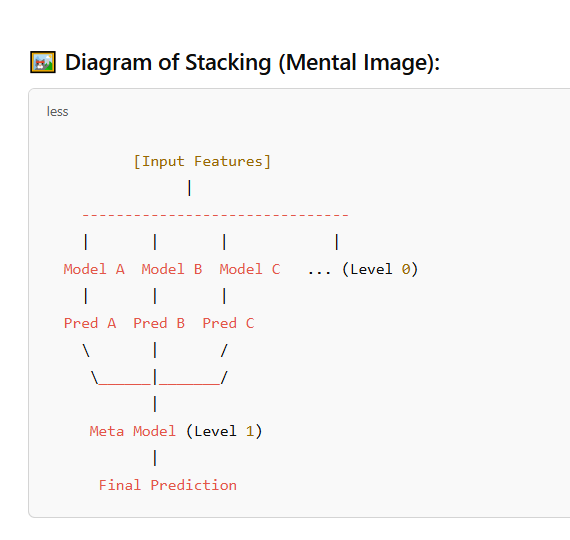

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Base learners
base_learners = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking classifier
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

stack.fit(X_train, y_train)
print("Stacked Model Accuracy:", stack.score(X_test, y_test))


Stacked Model Accuracy: 1.0


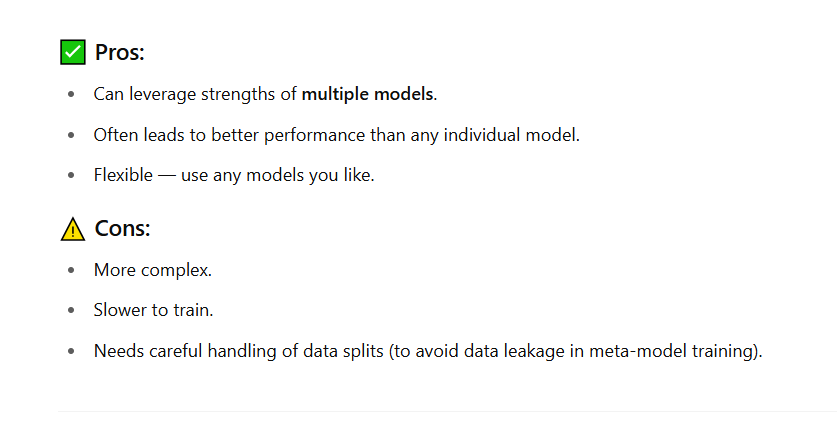

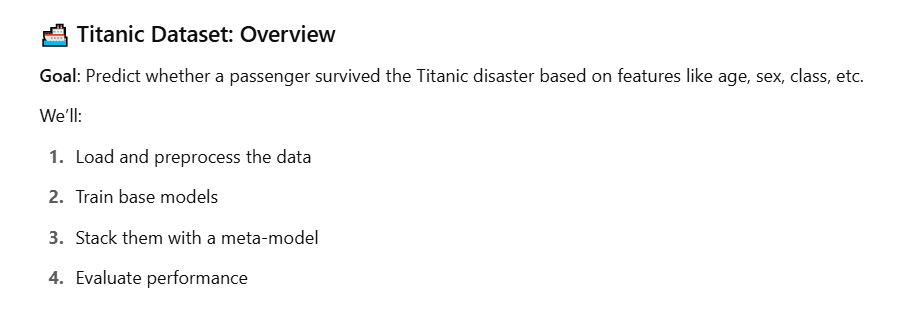

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Titanic dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = titanic[features + ['survived']].copy()

# Drop rows with too much missing data
df.dropna(subset=['sex', 'embarked'], inplace=True)

# Fill missing values for 'age' and 'fare'
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# Encode categorical features
df['sex'] = LabelEncoder().fit_transform(df['sex'])     # male=1, female=0
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])  # S=2, C=0, Q=1

# Define features and target
X = df[features]
y = df['survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=1)),
    ('svc', SVC(probability=True)),
    ('gb', GradientBoostingClassifier())
]

# Define meta-learner
meta_learner = LogisticRegression()

# Build stacking classifier
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

# Train
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacked_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {acc:.4f}")


Stacking Ensemble Accuracy: 0.8202
